# Results can be viewed here: https://drive.google.com/drive/folders/15mjSQIlYflujOu2naJ14hIV12E1UqtkK?usp=sharing

## Mount to drive to access the test and train data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Extract YOLOv5 essentials 

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14400, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 14400 (delta 14), reused 16 (delta 6), pack-reused 14371
Receiving objects: 100% (14400/14400), 13.55 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (9915/9915), done.


### Import relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import ast
import yaml
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from shutil import copyfile
import yaml

In [ ]:
# Install W&B 
!pip install -q --upgrade wandb

# Login 
import wandb
print(wandb.__version__)
wandb.login(anonymous='must')

     |████████████████████████████████| 1.9 MB 26.4 MB/s 
     |████████████████████████████████| 182 kB 69.7 MB/s 
     |████████████████████████████████| 168 kB 78.3 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 168 kB 83.1 MB/s 
     |████████████████████████████████| 166 kB 84.4 MB/s 
     |████████████████████████████████| 166 kB 70.2 MB/s 
     |████████████████████████████████| 162 kB 90.2 MB/s 
     |████████████████████████████████| 162 kB 80.7 MB/s 
     |████████████████████████████████| 158 kB 85.9 MB/s 
     |████████████████████████████████| 157 kB 87.5 MB/s 
     |████████████████████████████████| 157 kB 82.2 MB/s 
     |████████████████████████████████| 157 kB 88.9 MB/s 
     |████████████████████████████████| 157 kB 87.1 MB/s 
     |████████████████████████████████| 157 kB 88.7 MB/s 
     |████████████████████████████████| 157 kB 124.8 MB/s 
     |████████████████████████████████| 157 kB 88.9 MB/s 
     |█████████

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#### Created a yaml file containing train and validation data for yolov5s train.py which we will use later

In [ ]:
data = dict(train = '/content/drive/MyDrive/cots-data/images/train',
        val = '/content/drive/MyDrive/cots-data/images/validate',
        nc = 1,
        names = ['COTS']
        )

with open('/content/yolov5/data/data.yaml', 'w') as outfile:
    yaml.dump(data, outfile)

%cat /content/yolov5/data/data.yaml

names:
- COTS
nc: 1
train: /content/drive/MyDrive/cots-data/images/train
val: /content/drive/MyDrive/cots-data/images/validate


# Training

#### Train yolov5s with image size = 1280, batch size = 16 and 30 epochs over all training data images

In [ ]:
!python /content/yolov5/train.py --img 1280 --batch-size 16 --epochs 30 --patience 5 --data /content/yolov5/data/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --name finetuned_yolov5s_30epochs --weights /content/drive/MyDrive/cots-data/yolov5s.pt

wandb: Currently logged in as: anony-moose-457608. Use `wandb login --relogin` to force relogin
train: weights=/content/drive/MyDrive/cots-data/yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/yolov5/data/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=finetuned_yolov5s_30epochs, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momen

#### Print out an augmented training example

GROUND TRUTH AUGMENTED TRAINING DATA:


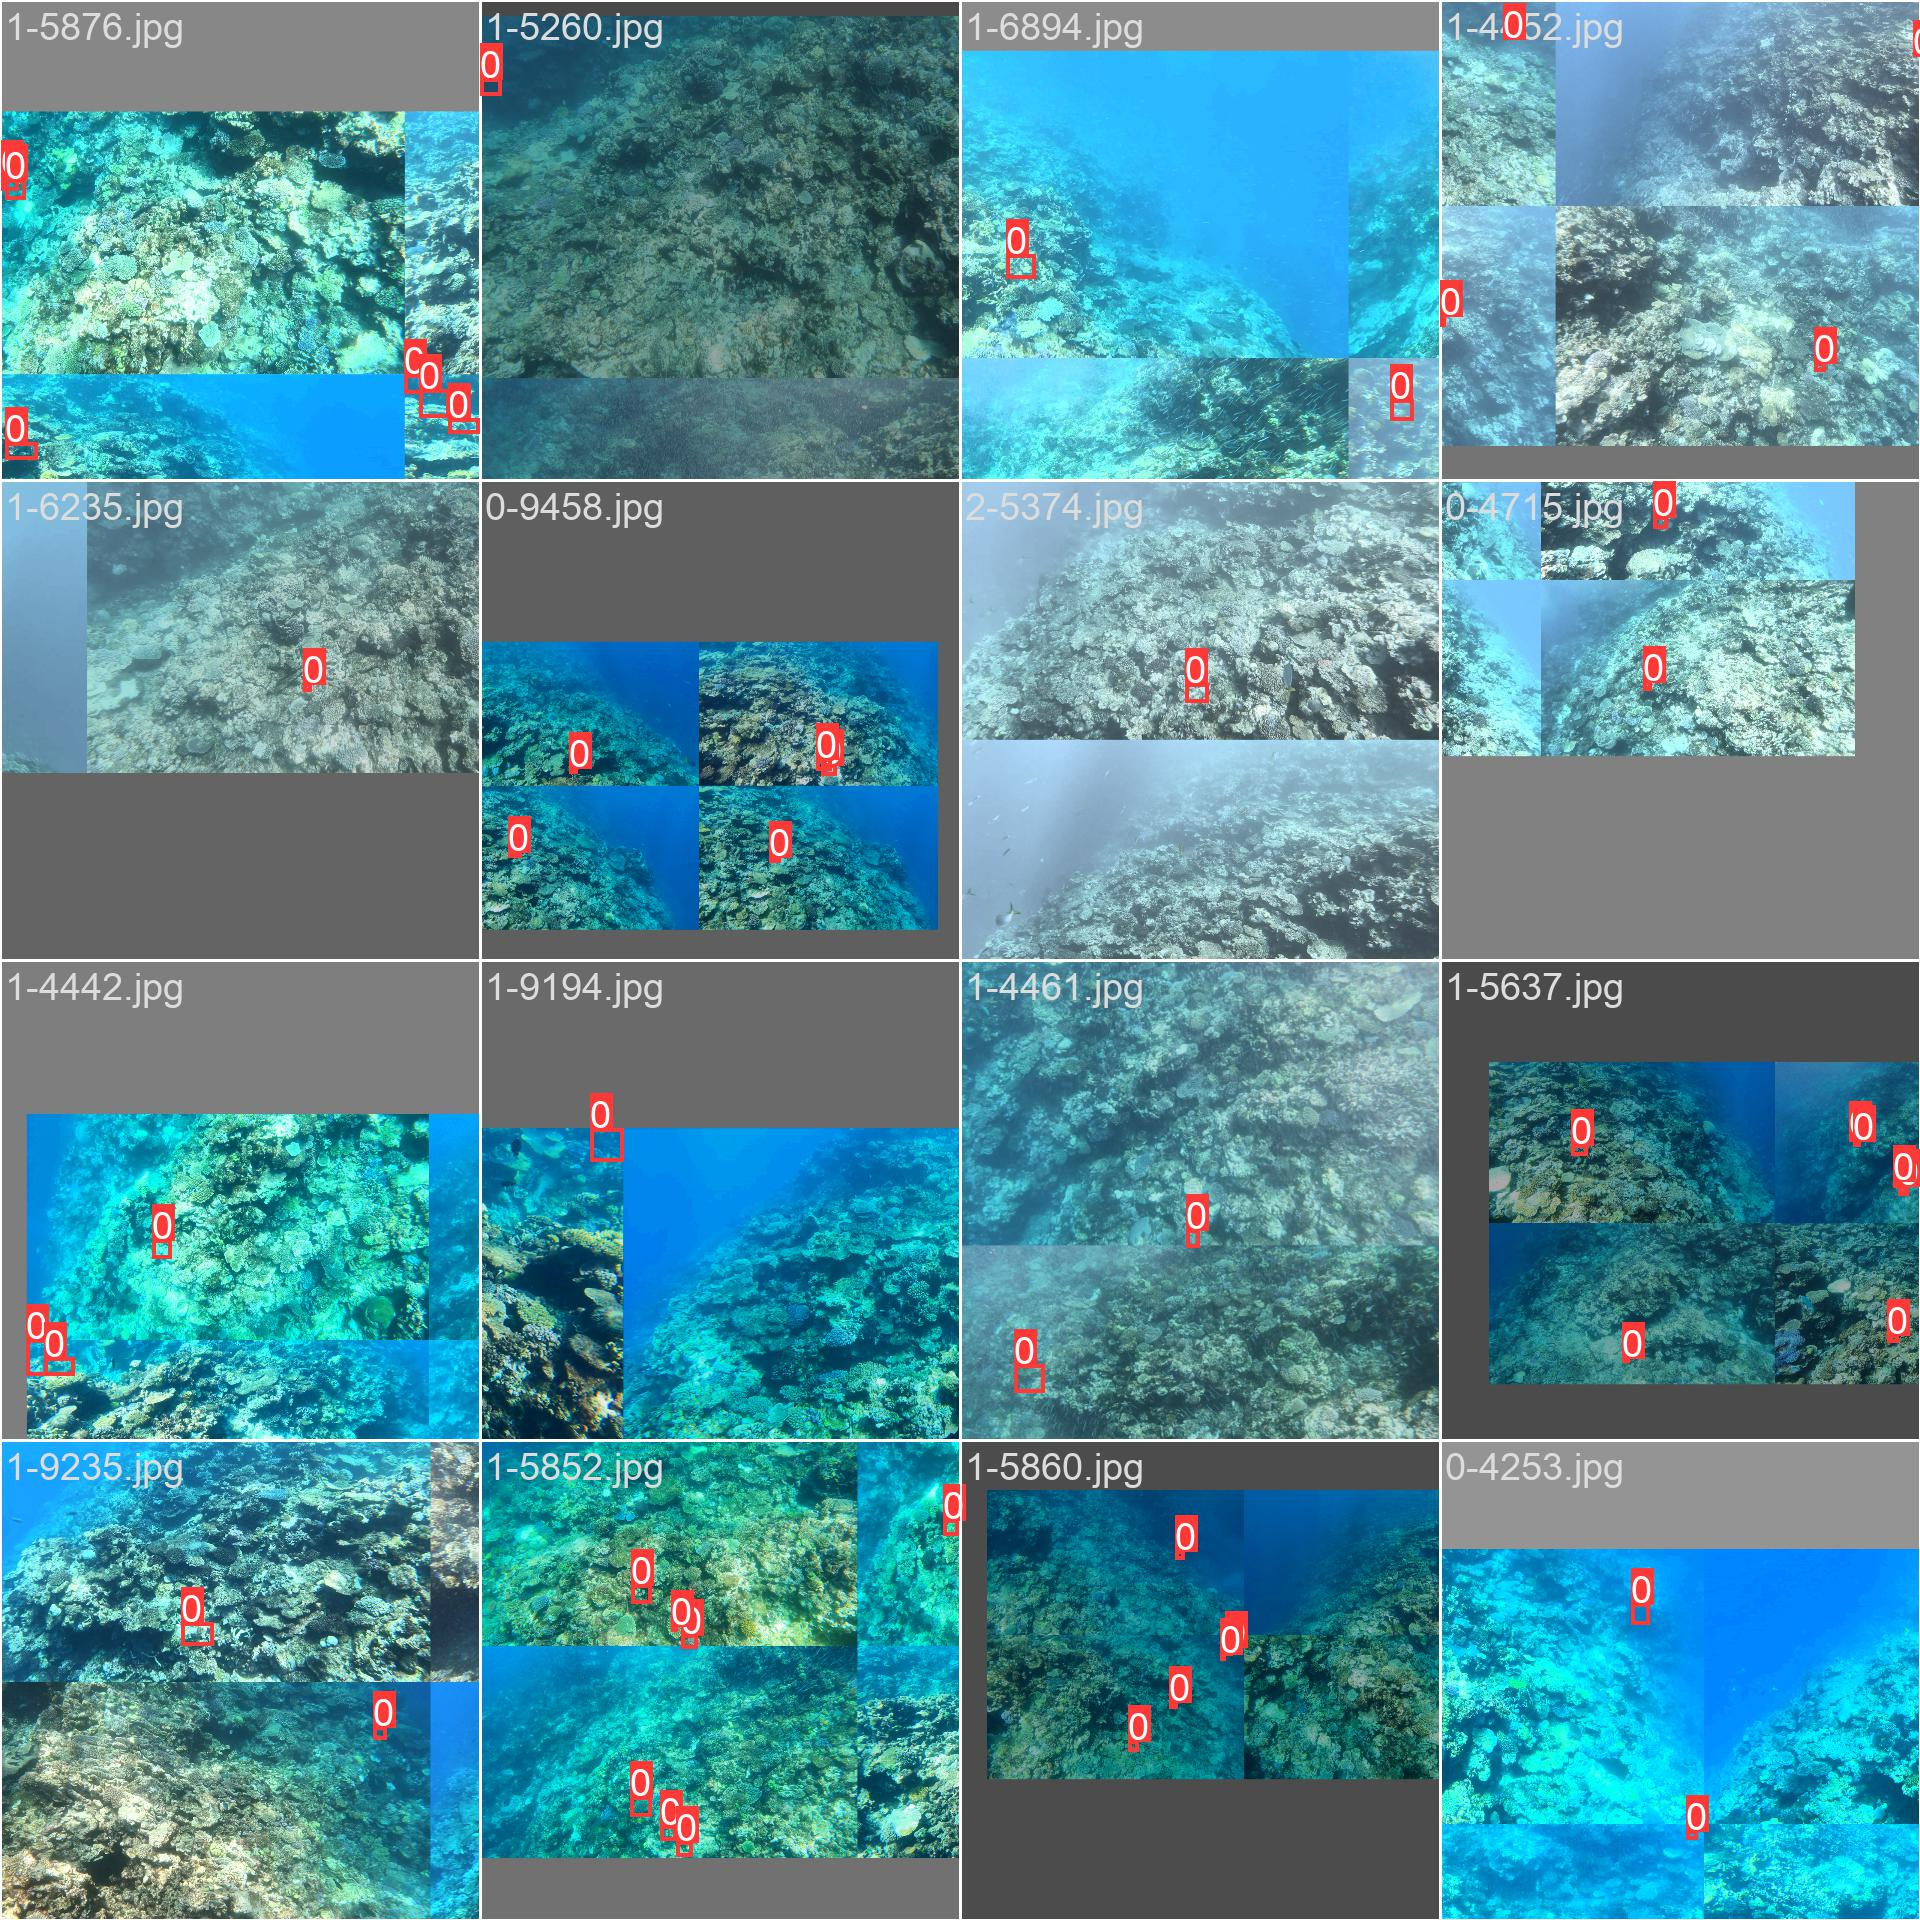

In [ ]:
# print out an augmented training example
from IPython.display import Image 
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/finetuned_yolov5s_30epochs2/train_batch0.jpg', width=900)

#### Zip and save the folder to drive

In [ ]:
#!zip -r /content/yolov5 . -i /content/finetuned_yolov5s_30epochs2
# zip and save folder to drive
!zip -r '/content/drive/MyDrive/cots-data/yolov5s_30epochs2.zip' '/content/yolov5/runs/train/finetuned_yolov5s_30epochs2'

updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/ (stored 0%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/P_curve.png (deflated 16%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/opt.yaml (deflated 51%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/confusion_matrix.png (deflated 38%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/events.out.tfevents.1670532498.2432ec65a140.562.0 (deflated 41%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/train_batch2.jpg (deflated 4%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/labels.jpg (deflated 32%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/val_batch2_labels.jpg (deflated 0%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/weights/ (stored 0%)
updating: content/yolov5/runs/train/finetuned_yolov5s_30epochs2/weights/last.pt (deflated 10%)
updating: content/yolov5/runs/train/finetuned_yolo

#### We saved the yolov5 folder (with the best model inside after 30 epochs) to drive

In [ ]:
!unzip /content/drive/MyDrive/cots-data/yolov5_entire_folder_with_trained_model.zip

Archive:  /content/drive/MyDrive/cots-data/yolov5_entire_folder_with_trained_model.zip
   creating: content/yolov5/
  inflating: content/yolov5/detect.py  
  inflating: content/yolov5/.gitattributes  
   creating: content/yolov5/.git/
  inflating: content/yolov5/.git/packed-refs  
   creating: content/yolov5/.git/objects/
   creating: content/yolov5/.git/objects/pack/
  inflating: content/yolov5/.git/objects/pack/pack-10ec080d2cd1f31c06074c09a26f8673779bcdad.pack  
  inflating: content/yolov5/.git/objects/pack/pack-10ec080d2cd1f31c06074c09a26f8673779bcdad.idx  
   creating: content/yolov5/.git/objects/info/
  inflating: content/yolov5/.git/description  
   creating: content/yolov5/.git/branches/
  inflating: content/yolov5/.git/index  
  inflating: content/yolov5/.git/FETCH_HEAD  
  inflating: content/yolov5/.git/config  
   creating: content/yolov5/.git/hooks/
  inflating: content/yolov5/.git/hooks/prepare-commit-msg.sample  
  inflating: content/yolov5/.git/hooks/pre-commit.sample  


# Testing

#### Re-run the detetion.py with 0.6 confidence level

In [ ]:
# !python /content/drive/MyDrive/Neural_Net_Project/The-Great-Barrier-Reef-Kaggle/yolov5/detect.py --weights /content/drive/MyDrive/yolov5_video0/yolov5s.pt --conf 0.4 --source /content/drive/MyDrive/cots-data-untouched/images/test

!python /content/content/yolov5/detect.py --weights /content/content/yolov5/runs/train/finetuned_yolov5s_30epochs2/weights/best.pt --conf 0.6 --source /content/drive/MyDrive/cots-data/images/test

detect: weights=['/content/content/yolov5/runs/train/finetuned_yolov5s_30epochs2/weights/best.pt'], source=/content/drive/MyDrive/cots-data/images/test, data=content/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=content/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /content/content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-27-g454dae1 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing laye

In [ ]:
# zip the detect folder and save folder to drive
!zip -r '/content/drive/MyDrive/cots-data/yolov5s_30epochs_detect3_0.6confidence.zip' '/content/content/yolov5/runs/detect/exp2'

  adding: content/content/yolov5/runs/detect/exp2/ (stored 0%)
  adding: content/content/yolov5/runs/detect/exp2/1-9484.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/1-4065.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/1-6770.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/0-9385.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/1-6737.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/1-4767.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/2-5394.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/0-4855.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/0-9338.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/0-4538.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/1-621.jpg (deflated 0%)
  adding: content/content/yolov5/runs/detect/exp2/0-4704.jpg (deflated 0%)
  adding: content/content/yolov5/runs/

#### Zip the entire yolov5 folder (with trained model) and save folder to drive

In [ ]:
# zip the entire yolov5 folder (with trained model) and save folder to drive
!zip -r '/content/drive/MyDrive/cots-data/yolov5_entire_folder_with_trained_model.zip' '/content/yolov5'

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/detect.py (deflated 69%)
  adding: content/yolov5/.gitattributes (deflated 4%)
  adding: content/yolov5/.git/ (stored 0%)
  adding: content/yolov5/.git/packed-refs (deflated 49%)
  adding: content/yolov5/.git/objects/ (stored 0%)
  adding: content/yolov5/.git/objects/pack/ (stored 0%)
  adding: content/yolov5/.git/objects/pack/pack-10ec080d2cd1f31c06074c09a26f8673779bcdad.pack (deflated 2%)
  adding: content/yolov5/.git/objects/pack/pack-10ec080d2cd1f31c06074c09a26f8673779bcdad.idx (deflated 2%)
  adding: content/yolov5/.git/objects/info/ (stored 0%)
  adding: content/yolov5/.git/description (deflated 14%)
  adding: content/yolov5/.git/branches/ (stored 0%)
  adding: content/yolov5/.git/index (deflated 55%)
  adding: content/yolov5/.git/FETCH_HEAD (deflated 64%)
  adding: content/yolov5/.git/config (deflated 33%)
  adding: content/yolov5/.git/hooks/ (stored 0%)
  adding: content/yolov5/.git/hooks/prepare-commit-msg.sample (

#### Print out some detected images with COTS

Detected images with COTS


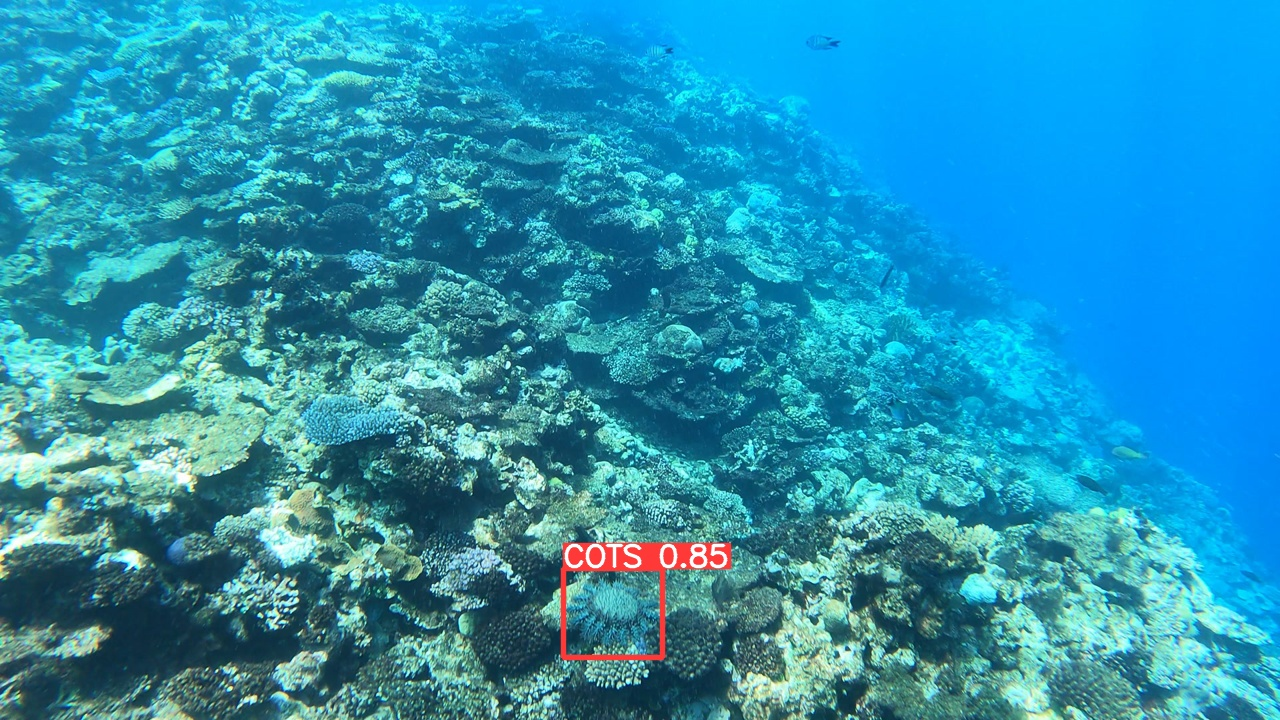

In [ ]:
# print out detected images with COTS
from IPython.display import Image 
print("Detected images with COTS")
Image(filename='/content/content/yolov5/runs/detect/exp2/0-5047.jpg', width=900)

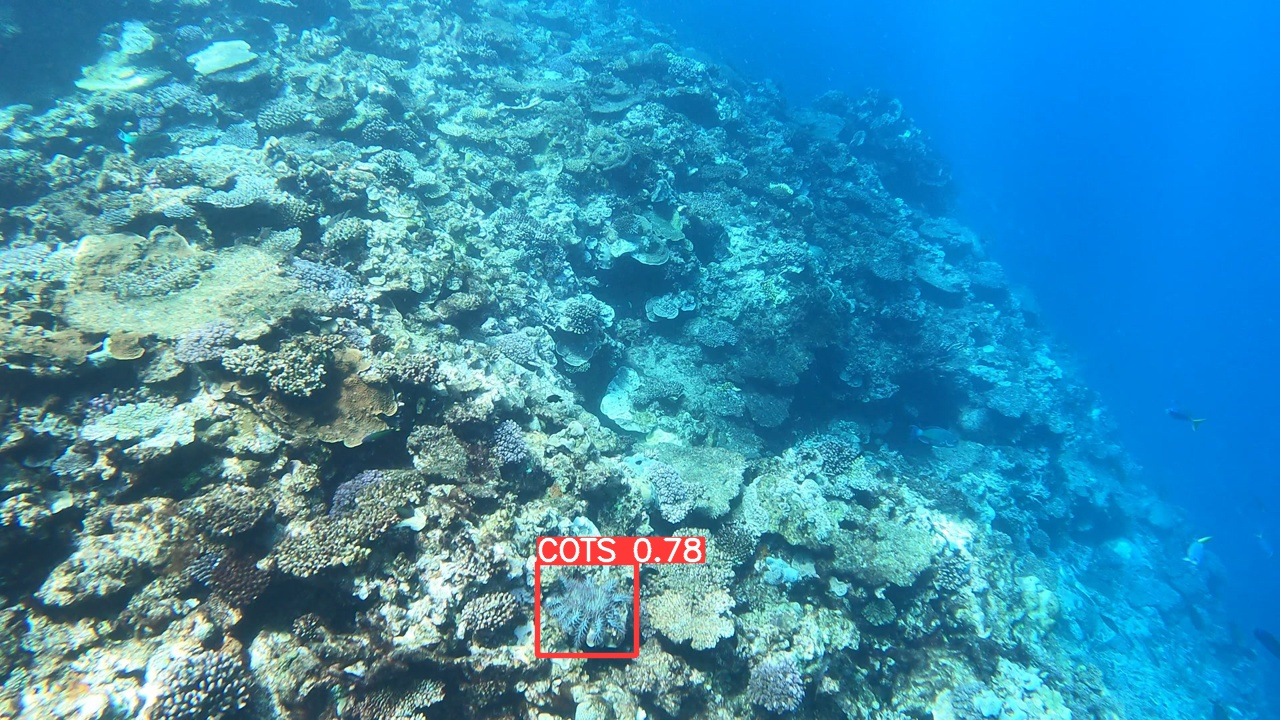

In [ ]:
Image(filename='/content/content/yolov5/runs/detect/exp2/0-9399.jpg', width=900)

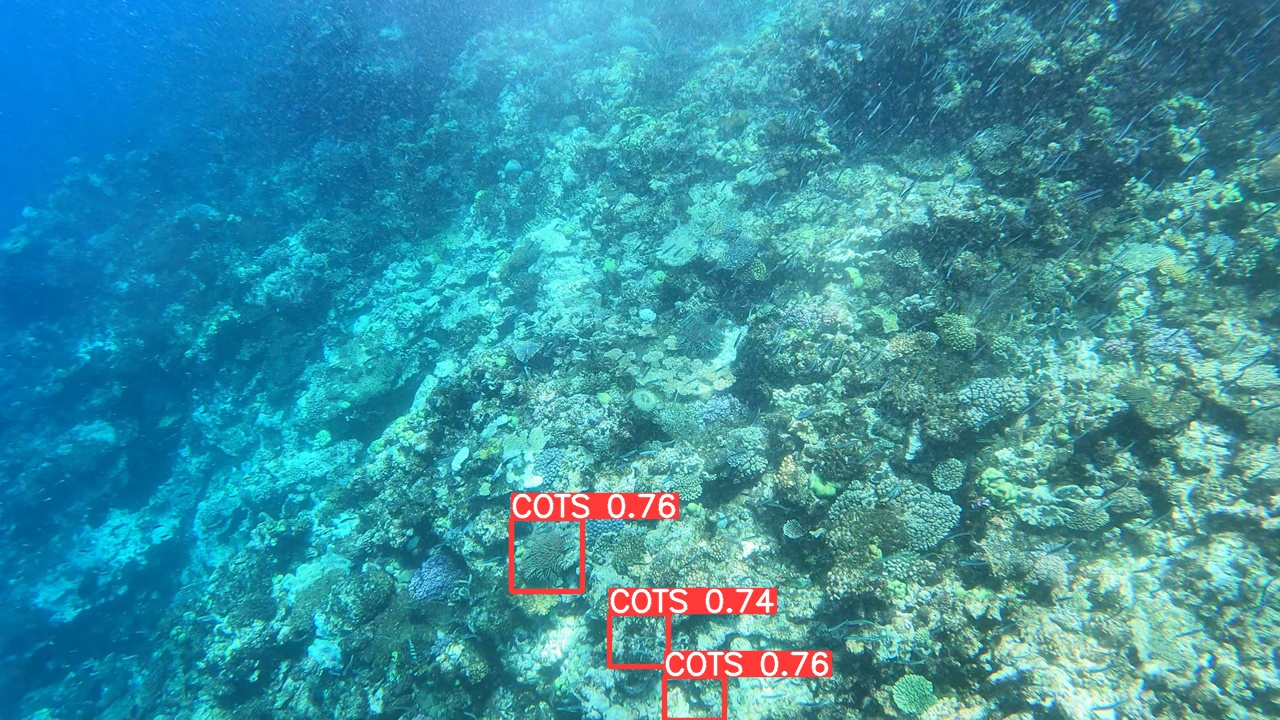

In [ ]:
Image(filename='/content/content/yolov5/runs/detect/exp2/1-6868.jpg', width=900)

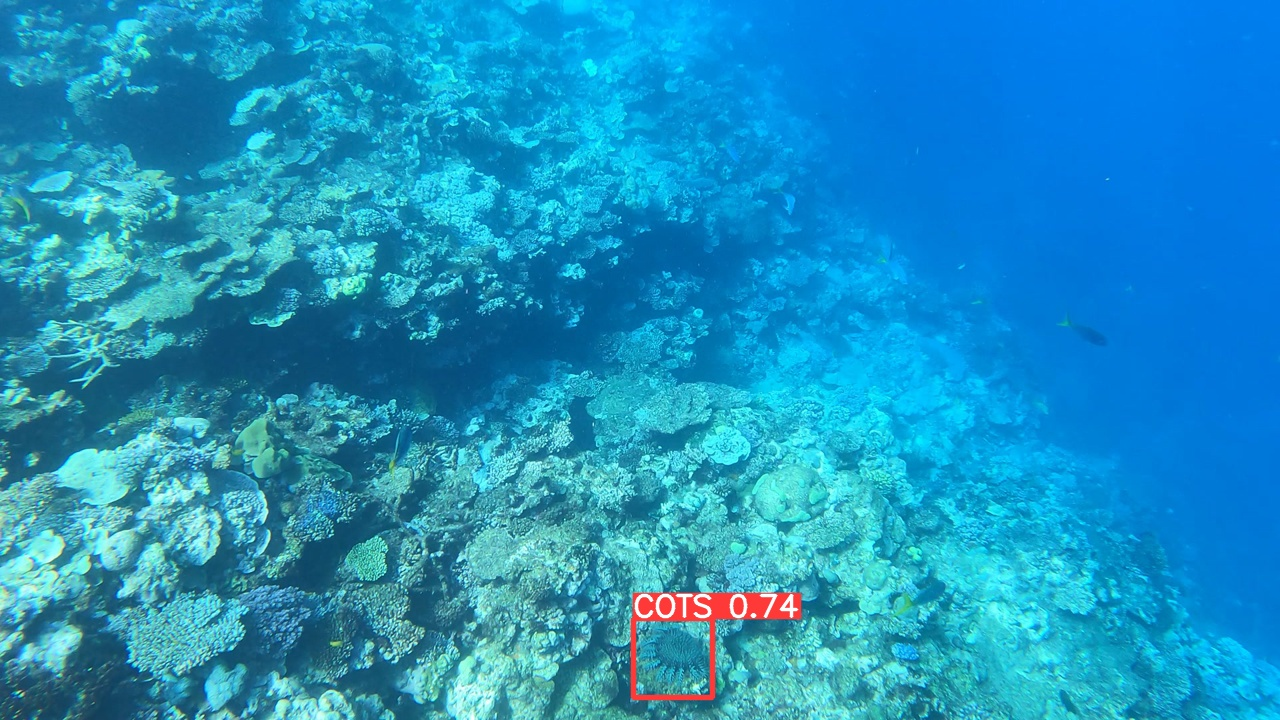

In [ ]:
Image(filename='/content/content/yolov5/runs/detect/exp2/0-4297.jpg', width=900)

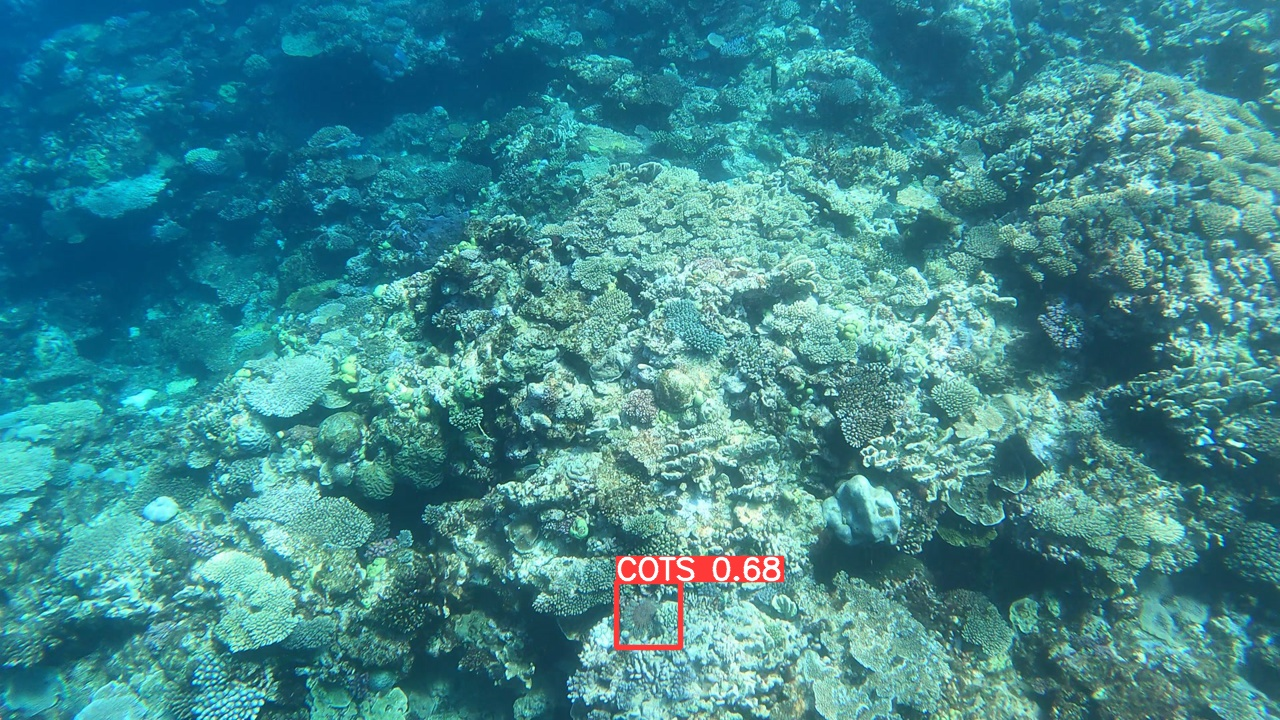

In [ ]:
Image(filename='/content/content/yolov5/runs/detect/exp2/2-5378.jpg', width=900)

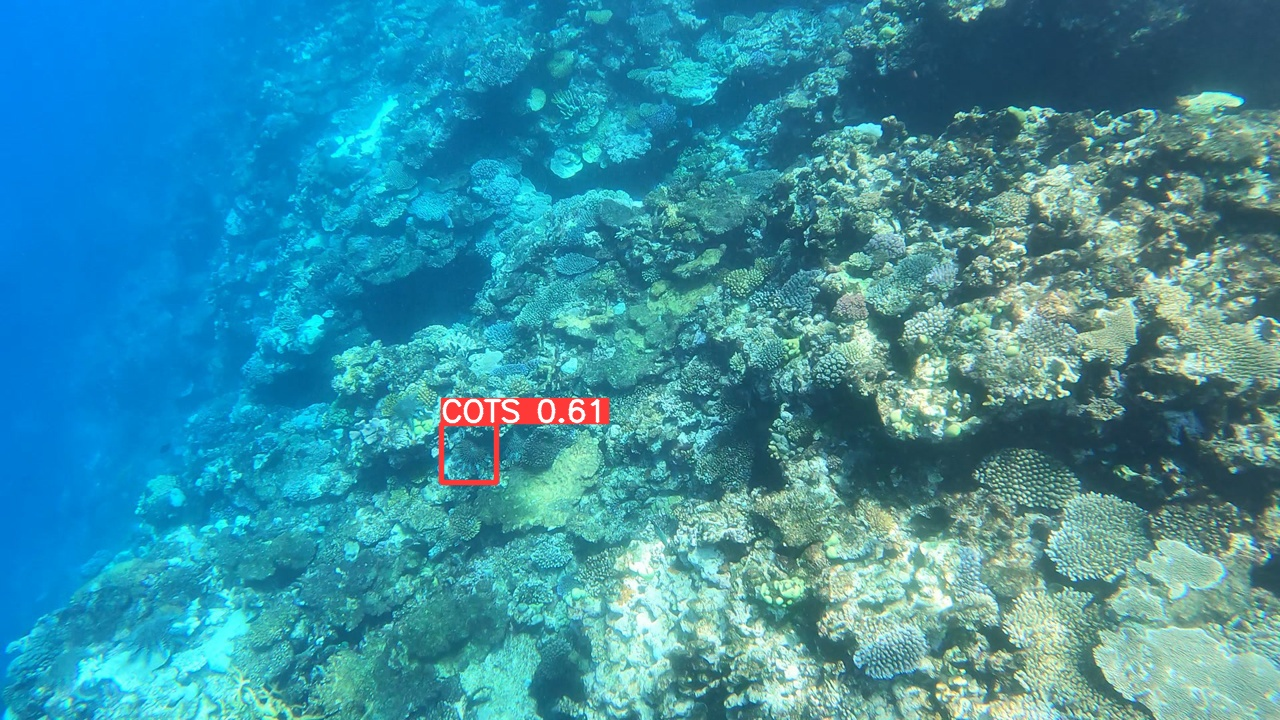

In [ ]:
Image(filename='/content/content/yolov5/runs/detect/exp2/1-9189.jpg', width=900)

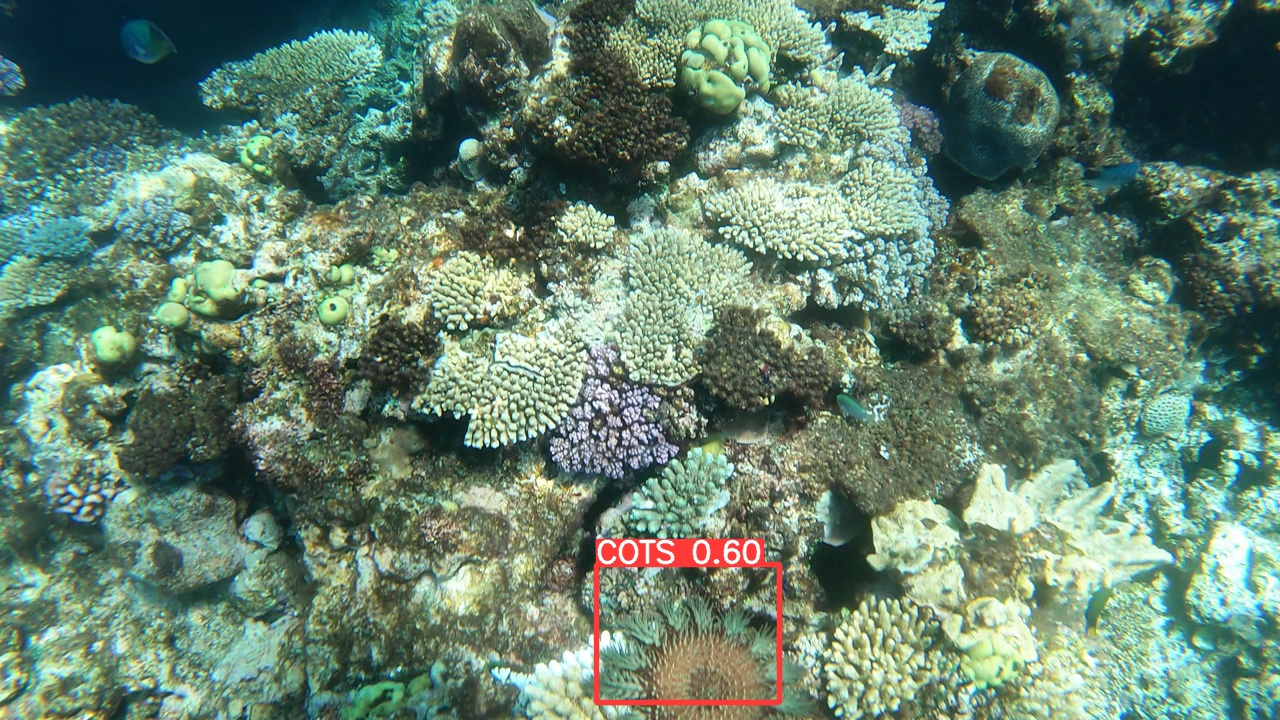

In [ ]:
Image(filename='/content/content/yolov5/runs/detect/exp2/1-630.jpg', width=900)